# Assignment 2:

To allow multiple outputs.

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
!pip install pandas-datareader

In [16]:
import pandas_datareader as pdr

In [17]:
import pandas as pd

In [18]:
import datetime

# Task 1:

Download the Apple stock data for the timeframe of 1982 to today.

Creating a function to download the Apple stock data froom yahoo finance for the timeframe of 1982 to today.In the function , we take 3 parameters(ticker,start date and end date)

In [388]:
start_date = datetime.datetime(1982, 1, 1)
end_date = datetime.datetime.today()
ticker = "AAPL"
def get_stock_data(ticker,start,end):
    df = web.get_data_yahoo('AAPL',start_date,end_date)
    return df
stock_data = get_stock_data('AAPL',start_date,end_date)
print(stock_data)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
1982-01-04    0.395089    0.395089    0.392857    0.392857    0.321458   
1982-01-05    0.377232    0.377232    0.372768    0.372768    0.305020   
1982-01-06    0.370536    0.370536    0.368304    0.368304    0.301367   
1982-01-07    0.343750    0.343750    0.339286    0.339286    0.277623   
1982-01-08    0.354911    0.357143    0.354911    0.354911    0.290408   
1982-01-11    0.334821    0.334821    0.332589    0.332589    0.272143   
1982-01-12    0.323661    0.323661    0.321429    0.321429    0.263011   
1982-01-13    0.321429    0.321429    0.319196    0.319196    0.261185   
1982-01-14    0.334821    0.337054    0.334821    0.334821    0.273970   
1982-01-15    0.357143    0.361607    0.357143    0.357143    0.292234   
1982-01-18    0.363839    0.368304    0.363839    0.363839    0.297714   
1982-01-19    0.359375    0.359375    

# Task 2:

Using the %magic command to activate inline matplotlib graphs:

In [37]:
%matplotlib inline

For plotting close series , first we find the series from the dataframe stock_data

In [40]:
close = stock_data['Close']

Showing only a few yearly closing prices of Apple below:

In [394]:
close.resample('AS').mean()

Date
1982-01-01       86.484368
1983-01-01      169.281248
1984-01-01      121.087050
1985-01-01       90.955355
1986-01-01      146.651775
1987-01-01      351.924107
1988-01-01      375.334820
1989-01-01      374.928569
1990-01-01      339.397324
1991-01-01      474.325889
1992-01-01      497.138388
1993-01-01      370.705363
1994-01-01      306.724890
1995-01-01      364.861597
1996-01-01      226.055240
1997-01-01      162.342624
1998-01-01      275.083699
1999-01-01      519.931911
2000-01-01      822.813587
2001-01-01      358.172856
2002-01-01      344.509996
2003-01-01      333.805719
2004-01-01      639.484998
2005-01-01     1680.337140
2006-01-01     2539.067148
2007-01-01     4599.535716
2008-01-01     5131.527142
2009-01-01     5285.308577
2010-01-01     9354.328558
2011-01-01    13104.155712
2012-01-01    20573.204266
2013-01-01    17014.855688
2014-01-01    23250.692890
2015-01-01    30250.079951
2016-01-01    26360.209983
2017-01-01    37788.319947
2018-01-01     2280.869

Now,plotting the entire close series as below:

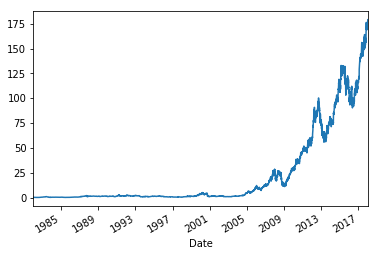

In [15]:
close.plot()

# Task 3:

Overview of Close series : getting the mean , count etc. for the series 'Close'

In [44]:
close.describe()

count    9091.000000
mean       22.765867
std        39.697882
min         0.196429
25%         1.092143
50%         1.669643
75%        23.522858
max       179.259995
Name: Close, dtype: float64

# Task 4:

Obtaining maximum closing price:

Approach 1: Using max() 

In [53]:
c_max= close.max()
print("Maximum closing price through approach1 is %s" %(c_max))

Maximum closing price through approach1 is 179.259995


Approach 2: Using nlargest(1) -->This will return the maximum number.doing n_largest will give a pair of date and value.To fetch the value,do get_value(index).

In [358]:
c_largest = close.nlargest(1).get_value(0)
#print(c_largest)
#c_largest.get_value(0)

In [360]:
print("Maximum closing price through approach2 is %s" %c_largest)

Maximum closing price through approach2 is 179.259995


Approach 3 : Using a loop to find the maximum price.This approach will compare each value in the series and find the max price

In [68]:
maximum = 0
for value in close:
    if value>maximum:
        maximum = value

print("Maximum closing price through approach3 is %s" %maximum)

Maximum closing price through approach3 is 179.259995


Difference between the 3 approaches described above : Approach 1 makes use of a built-in function max() which gives the maximum value directly.nlargest() in approach 2 gives the series of largest n elements in sorted order.So, if 1 is given as the parameters to nlargest,it will return the series with maximum value and from that we can fetch the value.In Approach 3,a loop is being used which compares each and every value and returns the highest value.

Approach 4 (first sort the values in descending order and then get the value from the series with index 0)

#close[len(close.sort_values())-1]
(close.sort_values(ascending = False)).get_value(0)

# Task 5:

Find the five timeframes with the highest stock price surge in five days (in % compared to the closing cost of the previous trading day). Do you notice something? Can you explain what happend during the timeframes?

First calculate the percentage change in the stock prices for a period of 5 days: ((5th day price - 1st day price)*100) using pct_change which computes the percent change over a given number of period.

In [263]:
tf=close.pct_change(4)*100
#print (tf)

Next, take the top 5 surges by nlargest()

In [60]:
top_surge = (tf.nlargest())
print(top_surge)

Date
1997-08-07    52.117274
1997-08-06    50.357120
1998-01-06    43.601879
1987-10-30    37.946400
1997-08-08    35.759481
Name: Close, dtype: float64


During August 1997, Microsoft saved Apple from bankcrupcy.Thus there was a surge in the stock prices
In 1987, Apple released MAcintosh which was a hit.Thus , there was a surge in stock prices

# Task 6

Resampling:

Resampling the data in close series to represent business quarters with quarter ending in September and starting in October.Using Business Quarter Start as frequency for resample function of Pandas and considering max price of the stock within a quarter as the representative value for that quarter. Naming the resampled series as quarter_start

In [243]:
quarter_start = close.resample('BQS-OCT').mean()
#print(quarter_start)

Date
1982-01-01      0.327765
1982-04-01      0.263747
1982-07-01      0.270752
1982-10-01      0.503418
1983-01-03      0.724383
1983-04-01      0.932504
1983-07-01      0.634173
1983-10-03      0.385877
1984-01-02      0.469530
1984-04-02      0.513676
1984-07-02      0.480017
1984-10-01      0.451625
1985-01-01      0.476670
1985-04-01      0.343112
1985-07-01      0.286033
1985-10-01      0.340088
1986-01-01      0.438817
1986-04-01      0.593471
1986-07-01      0.613665
1986-10-01      0.666050
1987-01-01      1.044787
1987-04-01      1.370961
1987-07-01      1.704311
1987-10-01      1.432826
1988-01-01      1.515519
1988-04-01      1.494898
1988-07-01      1.525739
1988-10-03      1.397321
1989-01-02      1.350158
1989-04-03      1.530692
                 ...    
2010-10-01     44.499241
2011-01-03     49.383318
2011-04-01     48.230340
2011-07-01     54.358616
2011-10-03     55.951225
2012-01-02     71.954263
2012-04-02     83.012879
2012-07-02     91.506213
2012-10-01     82.53

# Task 7: 

Considering a rolling window of 4 quarters, compute the percentage change in stock price.
Formula : price_diff = stock price in Q4- stock price in Q1.This will give the surge and then we can find surge percentage.

In [503]:
price_diff = quarter_start.pct_change(4)
surge_pct = price_diff*100

Then considering only those records in series where the surge percentage is greater than 100% by masking the data like below:

In [504]:
surge_pct[(surge_pct>100)]

Date
1983-01-03    121.006981
1983-04-01    253.559939
1983-07-01    134.226508
1986-07-01    114.543289
1987-01-01    138.091579
1987-04-01    131.007240
1987-07-01    177.726647
1987-10-01    115.122795
1998-10-01    103.206104
1999-10-01    147.425550
2000-01-03    205.119317
2000-04-03    148.083037
2004-10-01    155.106960
2005-01-03    228.608987
2005-04-01    164.219512
2005-07-01    175.269296
2005-10-03    128.483828
2007-07-02    104.830662
2007-10-01    115.600316
2009-10-01    107.798819
2010-01-01    125.334878
Name: Close, dtype: float64

Visulaizing the Surge Percentage data :

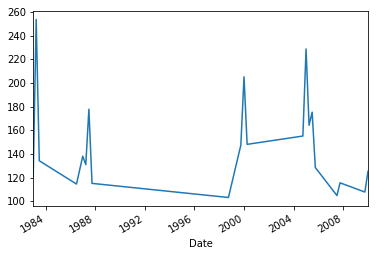

In [505]:
(surge_pct[(surge_pct>100)]).plot()

From the data and the graph , we can see there is one series of 4 quarters(2004-2005) with an overall surge greater than 100%.